In [387]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [388]:
df = pd.read_csv("/Users/azinshahiri/Desktop/My_proj/Algerian_forest_fires_dataset.csv")

In [389]:
df.shape

(247, 14)

In [390]:
df.iloc[:, :14]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [391]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [393]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [394]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [395]:
df.loc[:122,"Region"]=0
df.loc[122: ,"Region"]=1

In [396]:
df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0


In [397]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [398]:
df = df.dropna().reset_index(drop =True)

In [399]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [400]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [401]:
df = df.drop(122).reset_index(drop =True)

In [402]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [403]:
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']] = df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype(int)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), int64(6), object(8)
memory usage: 28.6+ KB


In [405]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [406]:
df.columns = df.columns.str.strip()
df2 = df["Classes"]
df2

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [407]:
df = df.drop("Classes", axis=1)

In [408]:

df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1.0
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1.0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [409]:
df2


0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [410]:
df["Classes"] = df2
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1.0,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1.0,not fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0,not fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0,not fire


In [411]:
df.describe()

,day,month,year,Temperature,RH,Ws,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,1.000000


In [412]:
df1 = df.to_csv("Cleand_Forest_Fires_Dataset.csv", index=False)

In [413]:
df1= pd.read_csv("/Users/azinshahiri/Desktop/My_proj/Cleand_Forest_Fires_Dataset.csv")

## Starting Data Analysis

In [414]:
df1= df1.drop(["day","month","year"],axis=1)

In [415]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Region', 'Classes'],
      dtype='object')

In [416]:
df1.head(20)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,not fire
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0,fire
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0,fire
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0.0,fire
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0.0,not fire
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0,not fire


In [417]:
df1["Classes"] = np.where(df1["Classes"].astype(str).str.contains("not fire", case=False), 0, 1)

In [418]:
df1.head(20)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0.0,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0.0,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0.0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0.0,0


In [419]:
df1["Classes"].value_counts()


Classes
1    137
0    106
Name: count, dtype: int64

In [426]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt



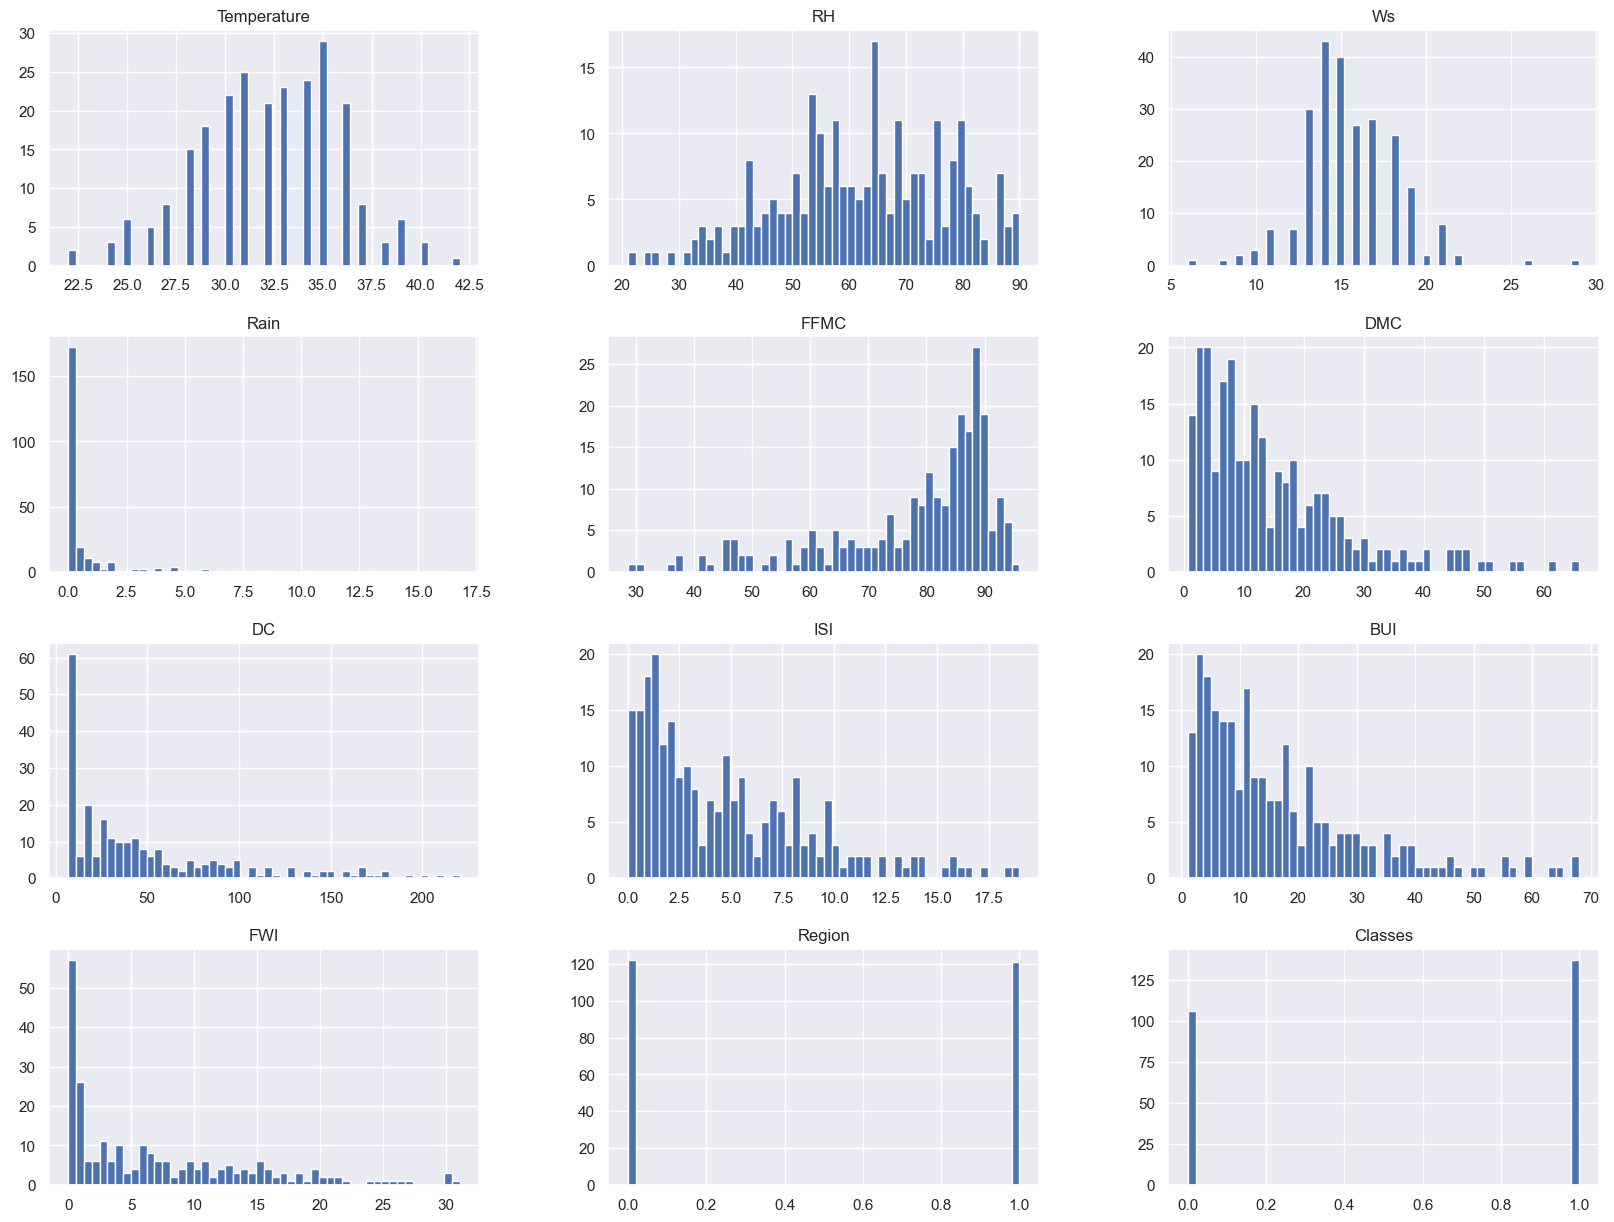

In [428]:
sns.set_theme()  # Apply seaborn theme to matplotlib plots
df1.hist(bins=50, figsize=(20, 15))
plt.show()

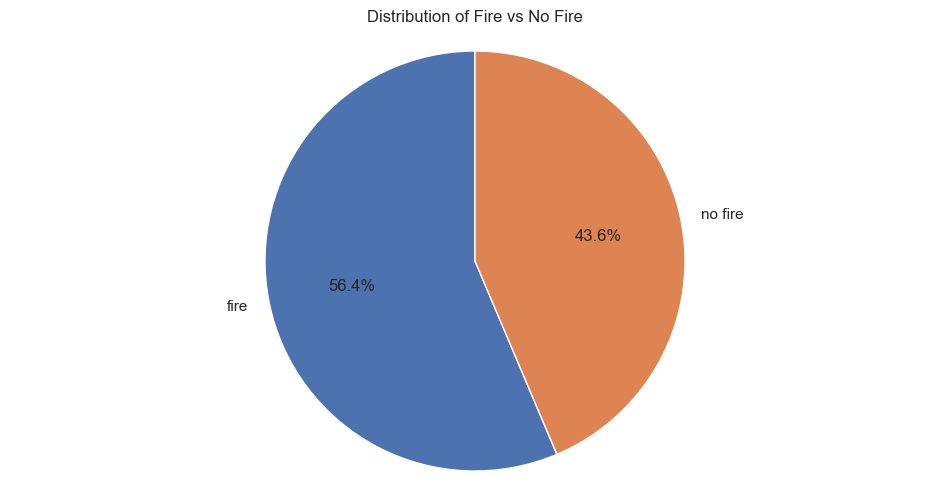

In [430]:

Classlabels = ["fire", "no fire"]
counts = df1["Classes"].value_counts()
percentage = counts / counts.sum() * 100  
plt.figure(figsize=(12, 6))
plt.pie(percentage, labels=Classlabels, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Fire vs No Fire")
plt.axis("equal")
plt.show()



In [431]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.089408,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.197102,0.719216


<Axes: >

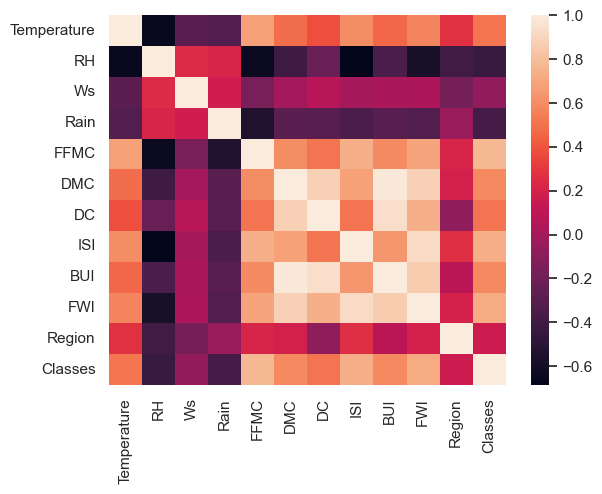

In [433]:
sns.heatmap(df1.corr())

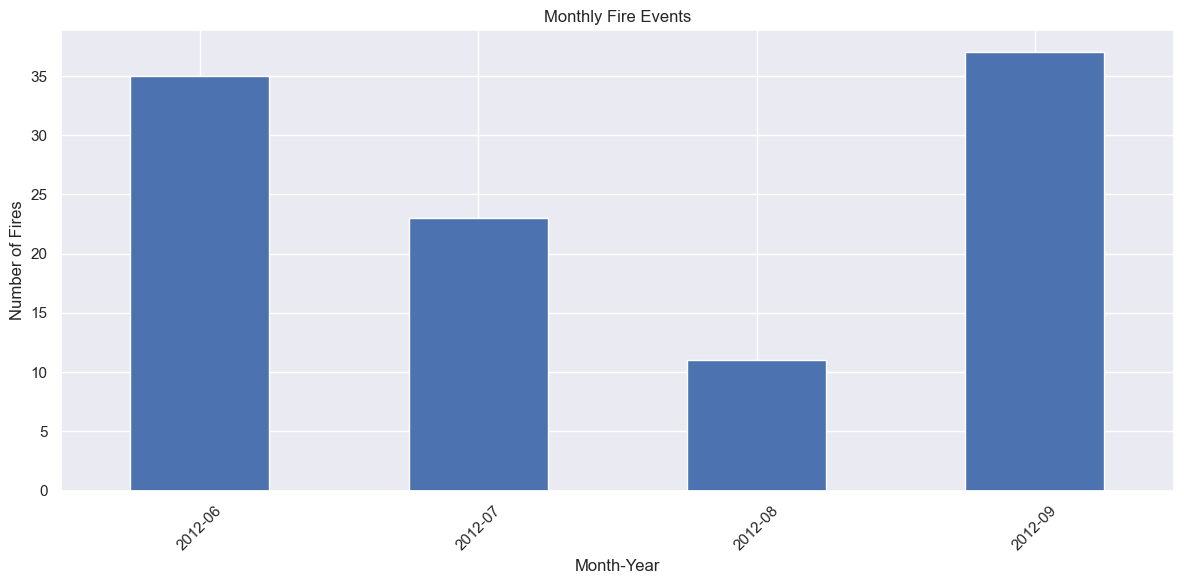

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Combine day, month, year into a single datetime column
df1['Date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Step 2: Extract the month-year period for grouping
df1['Month_Year'] = df1['Date'].dt.to_period('M')

# Step 3: Filter for fire events (assuming 0 represents fire)
fires_monthly = df1[df1['Classes'] == 0].groupby('Month_Year').size()

# Step 4: Plot the results
plt.figure(figsize=(12, 6))
fires_monthly.plot(kind='bar')
plt.title("Monthly Fire Events")
plt.xlabel("Month-Year")
plt.ylabel("Number of Fires")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [438]:
df1.to_csv("Final_Forest_Data.csv")